In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [2]:
df=pd.read_csv('Project_data/new_dataframe.csv')
df.head()

,dealer,bike_model,mtbr_in_days,avg_milage,consumption
0,A J XXXXXXXXXX,BAJAJ PULSAR 180,34,7887,20
1,A jyXXXXXXXXXX,BAJAJ PULSAR NS 200,32,728,6
2,a naXXXXXXXXXX,BAJAJ PULSAR 180,41,2245,13
3,a raXXXXXXXXXX,BAJAJ PULSAR 150,0,4122,6
4,A suXXXXXXXXXX,BAJAJ PULSAR RS 200,50,5479,7


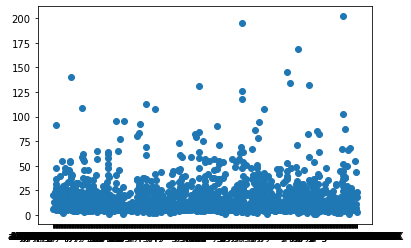

In [3]:
#Checking outliers

df= df.dropna()

plt.scatter(df.dealer,df.consumption)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1620 entries, 0 to 1619
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   dealer        1620 non-null   object
 1   bike_model    1620 non-null   object
 2   mtbr_in_days  1620 non-null   int64 
 3   avg_milage    1620 non-null   int64 
 4   consumption   1620 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 75.9+ KB


In [5]:
# label encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.dealer= le.fit_transform(df.dealer)
df.bike_model= le.fit_transform(df.bike_model)

In [6]:
df.head()

,dealer,bike_model,mtbr_in_days,avg_milage,consumption
0,0,13,34,7887,20
1,1,18,32,728,6
2,205,13,41,2245,13
3,206,12,0,4122,6
4,2,19,50,5479,7


In [7]:
df.corr().consumption.sort_values()

bike_model     -0.003850
dealer          0.023958
avg_milage      0.098771
mtbr_in_days    0.124301
consumption     1.000000
Name: consumption, dtype: float64

In [8]:
# X and y split 

X=df.loc[:,['dealer','bike_model','mtbr_in_days','avg_milage']]
y=df.consumption

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.20,random_state=45)

In [10]:
# initialising xgboost

from xgboost import XGBRegressor

model = XGBRegressor(
base_score=0.5,
booster='gbtree',
colsample_bylevel=1,
colsample_bynode=1,
colsample_bytree=1,
gamma=0,
gpu_id=-1,
importance_type='gain',
interaction_constraints='',
learning_rate=0.300000012,
max_delta_step=0,
max_depth=3,
min_child_weight=1,
monotone_constraints='()',
n_estimators=50,
n_jobs=4,
num_parallel_tree=1,
random_state=0,
reg_alpha=0,
reg_lambda=1,
scale_pos_weight=1,
subsample=1,
tree_method='exact',
validate_parameters=1,
verbosity=None
)



# model = XGBRegressor()

model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:
y_predict = model.predict(X_test)

In [12]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.26628856009288415

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.09876543209876543

## trying LinearRegression

In [13]:
# initialising LinearRegression

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_predict = model.predict(X_test)

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.02292870571841865

In [16]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1, gamma=0.05) # tuning hyper parameter
model.fit(X_train, y_train)

SVC(C=1, gamma=0.05)

In [17]:
y_predict = model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.09876543209876543